In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHAYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv("hospital.csv")

In [6]:
data

,Feedback,Sentiment Label,Ratings,Unnamed: 3
0,Good and clean hospital. There is great team o...,1,5,NaN
1,Had a really bad experience during discharge. ...,1,5,NaN
2,I have visited to take my second dose and Proc...,1,4,NaN
3,That person was slightly clueless and offered...,1,3,NaN
4,There is great team of doctors and good OT fac...,0,1,NaN
...,...,...,...,...
991,very careful about safety measures every one i...,1,4,NaN
992,I do not trust in their reports I got same tes...,0,2,NaN
993,They just want the patients to return to their...,0,1,NaN
994,I suggest you not to visit this hospital if yo...,0,2,NaN


In [7]:
print(f"Feature names : {data.columns.values}")

Feature names : ['Feedback' 'Sentiment Label' 'Ratings' 'Unnamed: 3']


In [8]:
data.isnull().sum()

Feedback             0
Sentiment Label      0
Ratings              0
Unnamed: 3         996
dtype: int64

In [9]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (996, 4)


In [10]:
#Creating a new column 'length' that will contain the length of the string in 'Feedback'
data['length'] = data['Feedback'].apply(len)

In [11]:
data

,Feedback,Sentiment Label,Ratings,Unnamed: 3,length
0,Good and clean hospital. There is great team o...,1,5,NaN,273
1,Had a really bad experience during discharge. ...,1,5,NaN,133
2,I have visited to take my second dose and Proc...,1,4,NaN,198
3,That person was slightly clueless and offered...,1,3,NaN,161
4,There is great team of doctors and good OT fac...,0,1,NaN,52
...,...,...,...,...,...
991,very careful about safety measures every one i...,1,4,NaN,92
992,I do not trust in their reports I got same tes...,0,2,NaN,97
993,They just want the patients to return to their...,0,1,NaN,134
994,I suggest you not to visit this hospital if yo...,0,2,NaN,81


In [12]:
#Randomly checking for 11th record
print(f"'Feedback' column value: {data.iloc[11]['Feedback']}") #Original value
print(f"Length of review : {len(data.iloc[11]['Feedback'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[11]['length']}") #Value of the column 'length'

'Feedback' column value: Thanks to the Emergency doctor abhishek and Thanks to the security guard there
Length of review : 78
'length' column value : 78


In [13]:
data.dtypes

Feedback            object
Sentiment Label      int64
Ratings              int64
Unnamed: 3         float64
length               int64
dtype: object

In [14]:
#Distinct values of 'rating' and its count  
print(f"Rating value count: \n{data['Ratings'].value_counts()}")

Rating value count: 
Ratings
5    351
4    254
2    145
3    123
1    123
Name: count, dtype: int64


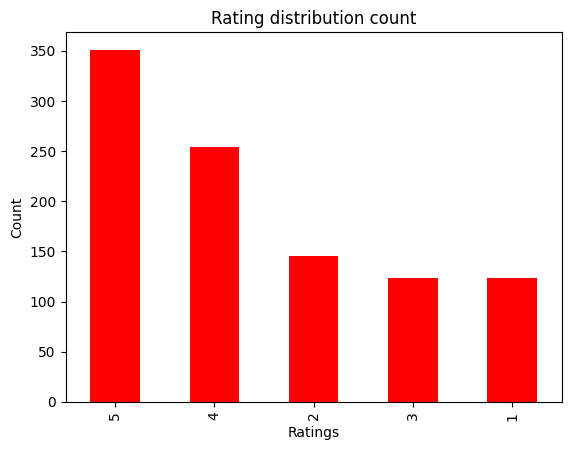

In [15]:
#Bar plot to visualize the total counts of each rating
data['Ratings'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [16]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(data['Ratings'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
Ratings
5    35.24
4    25.50
2    14.56
3    12.35
1    12.35
Name: count, dtype: float64


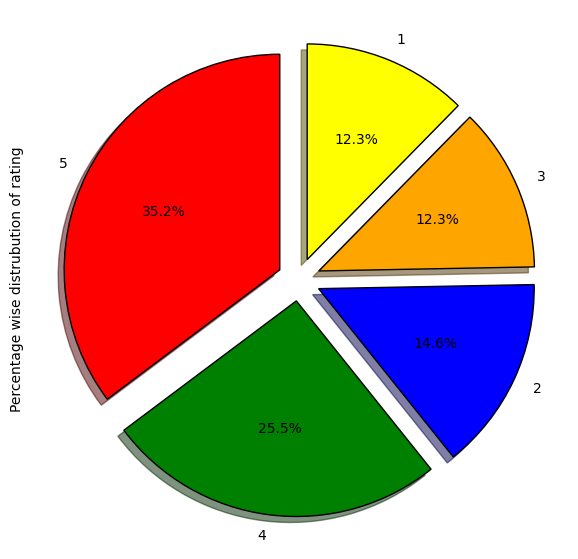

In [17]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['Ratings'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [18]:
print(f"Sentiment lable count: \n{data['Sentiment Label'].value_counts()}")

Sentiment lable count: 
Sentiment Label
1    728
0    268
Name: count, dtype: int64


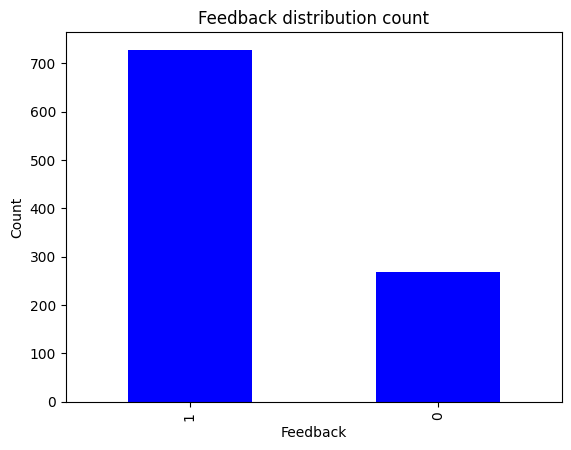

In [19]:

#Bar graph to visualize the total counts of Sentiment lables

data['Sentiment Label'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [20]:
#Finding the percentage distribution of each feedback

print(f"Sentiment Label count - percentage distribution: \n{round(data['Sentiment Label'].value_counts()/data.shape[0]*100,2)}")

Sentiment Label count - percentage distribution: 
Sentiment Label
1    73.09
0    26.91
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of Sentiment Label'>

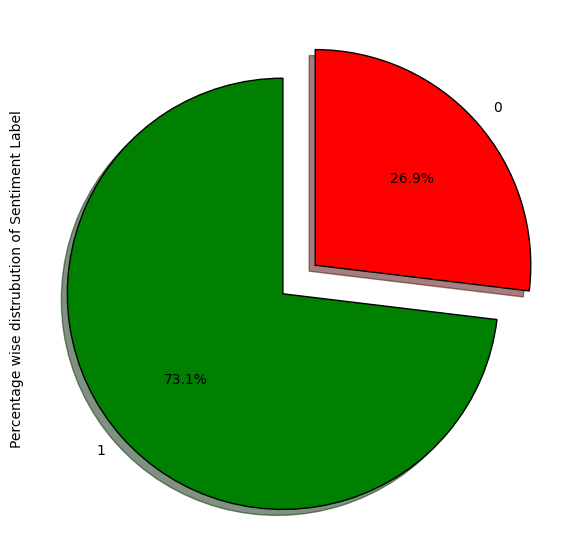

In [21]:
fig = plt.figure(figsize=(7,7))

colors = ('green','red')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['Sentiment Label'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Sentiment Label')

In [22]:
#Sentiment Label = 1
data[data['Sentiment Label'] == 1]['Ratings'].value_counts()

Ratings
5    351
4    254
3    123
Name: count, dtype: int64

In [23]:
#Sentiment Label = 0
data[data['Sentiment Label'] == 0]['Ratings'].value_counts()

Ratings
2    145
1    123
Name: count, dtype: int64

In [24]:

data['length'].describe()

count    996.000000
mean     118.988956
std       59.818426
min        4.000000
25%       81.000000
50%      108.000000
75%      147.000000
max      889.000000
Name: length, dtype: float64

In [25]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.Feedback)

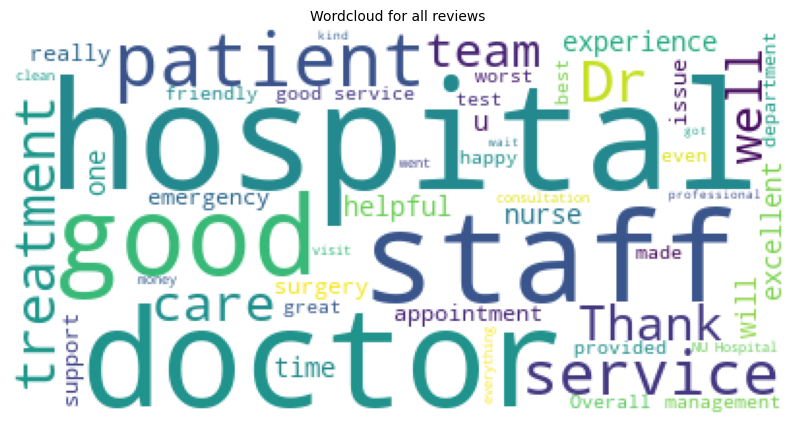

In [26]:
# Combine all reviews
reviews = " ".join([review for review in data['Feedback']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()


In [27]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['Sentiment Label'] == 0]['Feedback']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['Sentiment Label'] == 1]['Feedback']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


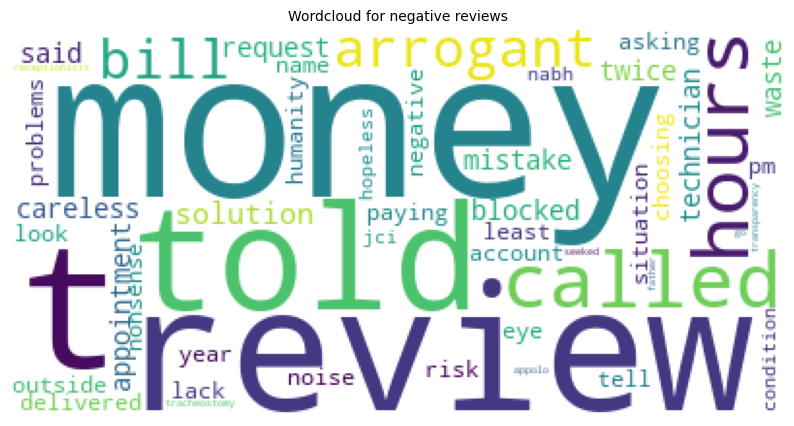

In [28]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()


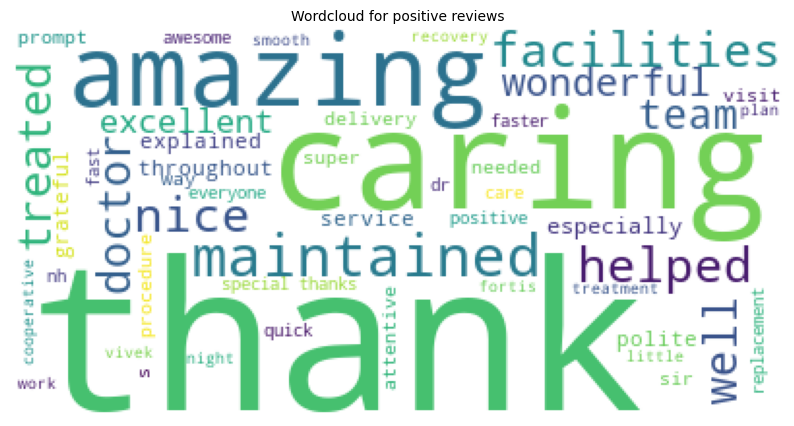

In [29]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()


In [30]:
#Preprocessing and Modelling
#To build the corpus from the 'Feedback' we perform the following -

#Replace any non alphabet characters with a space
#Covert to lower case and split into words
#Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [31]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['Feedback'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [32]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['Sentiment Label'].values

In [33]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [34]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (996, 1869)
y shape: (996,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (796, 1869)
y train: (796,)
X test: (200, 1869)
y test: (200,)


In [36]:

print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 5
X test max value: 3


In [37]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [38]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [39]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9585427135678392
Testing Accuracy : 0.83


In [41]:
y_preds = model_xgb.predict(X_test)

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 26  21]
 [ 15 138]]


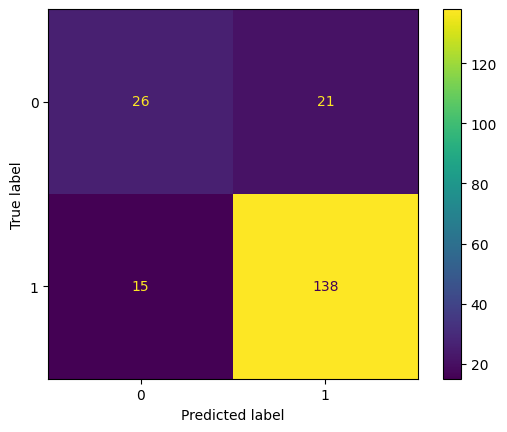

In [43]:

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [44]:

#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))